In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/diabetes.csv')

In [3]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<ipython-input-7-463ca6d0569a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outcome', y='Count', data=outcome_df, palette='pastel')


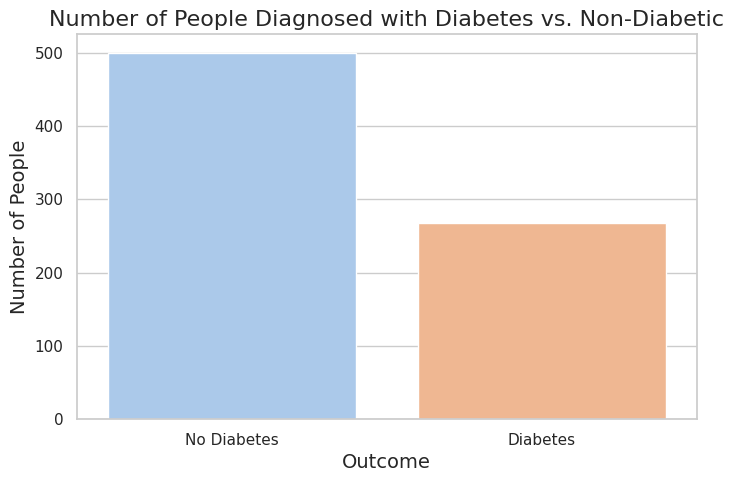

In [7]:
# Count the number of people with and without diabetes
outcome_counts = data['Outcome'].value_counts()

# Create a DataFrame for easier plotting
outcome_df = pd.DataFrame({
    'Outcome': ['No Diabetes', 'Diabetes'],
    'Count': outcome_counts.values
})

# Set the visual style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Outcome', y='Count', data=outcome_df, palette='pastel')

# Add titles and labels
plt.title('Number of People Diagnosed with Diabetes vs. Non-Diabetic', fontsize=16)
plt.xlabel('Outcome', fontsize=14)
plt.ylabel('Number of People', fontsize=14)

# Show the plot
plt.show()


In [ ]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[replace] = data[replace].applymap(lambda x: pd.NA if x == 0 else x)
print(data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


<ipython-input-49-1cd163907f76>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[replace] = data[replace].applymap(lambda x: pd.NA if x == 0 else x)


In [ ]:
data[['Glucose', 'BloodPressure']] = data[['Glucose', 'BloodPressure']].apply(lambda col: col.fillna(col.mean()))

data[['SkinThickness', 'Insulin', 'BMI']] = data[['SkinThickness', 'Insulin', 'BMI']].apply(lambda col: col.fillna(col.median()))

print(data.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.7532467532467533
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



Confusion Matrix:
 [[79 20]
 [18 37]]


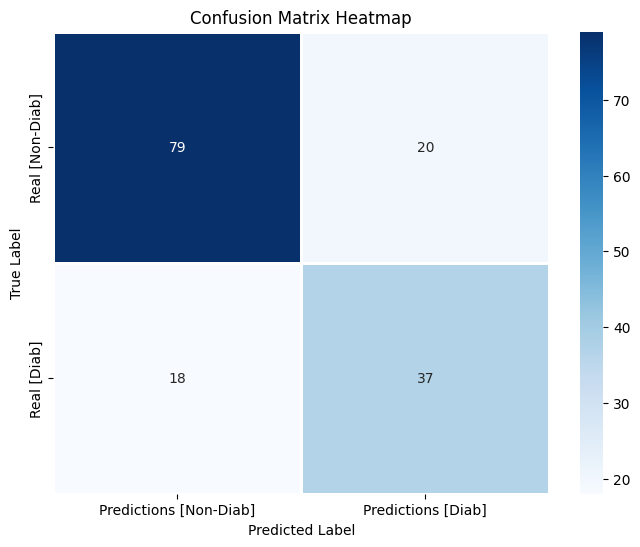

In [ ]:
# حساب مصفوفة الالتباس
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", cm)

# إعداد التسميات
ylabel = ["Real [Non-Diab]", "Real [Diab]"]
xlabel = ["Predictions [Non-Diab]", "Predictions [Diab]"]

# رسم مصفوفة الالتباس كخريطة حرارية
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=xlabel, yticklabels=ylabel, linecolor='white', linewidths=1, cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# try Random **Forest**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.7597402597402597
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



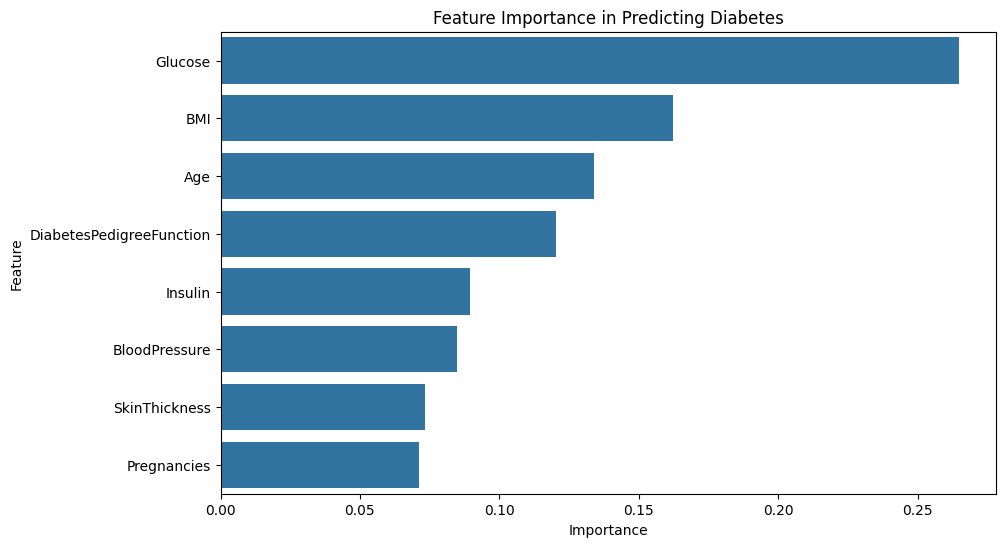

In [ ]:
# استخراج أهمية الميزات
feature_importances = model.feature_importances_

# ترتيب الميزات حسب الأهمية
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# رسم الفيزوالايزيشن
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Predicting Diabetes')
plt.show()